### Project: World Happiness Report 2017

### Intern Name: Lakshminarayanareddy Marapareddygarihanumanthu
### Internship Number: DS2405

#### Project Statement:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was
published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World
Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations
at an event celebrating International Day of Happiness on March 20th. The report continues to gain global
recognition as governments, organizations and civil society increasingly use happiness indicators to
inform their policy-making decisions. Leading experts across fields – economics, psychology, survey
analysis, national statistics, health, public policy and more – describe how measurements of well-being
can be used effectively to assess the progress of nations. The reports review the state of happiness in the
world today and show how the new science of happiness explains personal and national variations in
happiness.


#### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing
Dystopia is to have a benchmark against which all countries can be favorably compared (no country
performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar
to be of positive width. The lowest scores observed for the six key variables, therefore, characterize
Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life
expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as
“Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six
variables either over- or under-explain average life evaluations. These residuals have an average value of
approximately zero over the whole set of countries.

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust
Government Corruption describe the extent to which these factors contribute in evaluating the happiness
in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the
unexplained value for each country.

The Dystopia Residual is already provided in the dataset.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to
predict Happiness Scores.

#### Project Aim: Predict the happiness score considering all the factors mentioned in the data set.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
df = pd.read_csv("happynessreport_2017.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
# Checking the dimension of the data set
df.shape
print(f"Data set contains", df.shape[0],"rows and ",df.shape[1]," columns.")

Data set contains 158 rows and  12  columns.


In [6]:
# All column's names of the data set (by type casting columns of data set into a list)
print("All column names of the data set are: ",df.columns.tolist())

All column names of the data set are:  ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [7]:
# To see the data types of each column of the data set
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### Observations about the given data set:

The data set contains 158 rows and 12 columns. Except "Country" and "Region" columns all other columns numeric type (float64 or int64). Here "Happiness Score" is the dependent or target variable and all other variables are treated as independent features.


Here we need to predict the numerical value of Happiness Score based on all other features. Hence, this problem will be termed as "Regression Problem".

Clearly, we can see that three different data types data present in the given data set.

### Exploratory Data Analysis (EDA)

#### Dealing with missing values (None, NaN and others) and Cleaning the data set

In [8]:
# First, looking for presence of null or missing values in any of the column of a data set
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

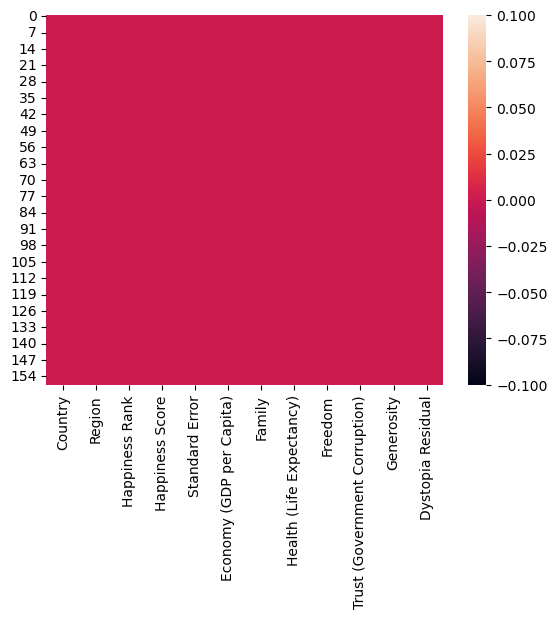

In [9]:
# Visualize the presence of null/missing values using Heatmap
sns.heatmap(df.isnull())

From the above, one can notice that there is only one colour present in the heat map which corresponds to colour value 0. Which means there are no null or missing values present in any of the column's of the data set. 

In [10]:
# To get an overveiw about indexing, null values and data types of columns, memory, etc. of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
# checking value counts of every column in the data set
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [12]:
# Lets separate columns into categorical and numerical 
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
    else:
        num_col.append(i)

        
print(f"Categorical columns are: {cat_col} \n")
print(f"Numerical columns are: {num_col}")
   

Categorical columns are: ['Country', 'Region'] 

Numerical columns are: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [13]:
# Now, check for unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [14]:
# To see the unique values of Region column
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [15]:
# Statistical summary of numerical columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Data Visualization

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


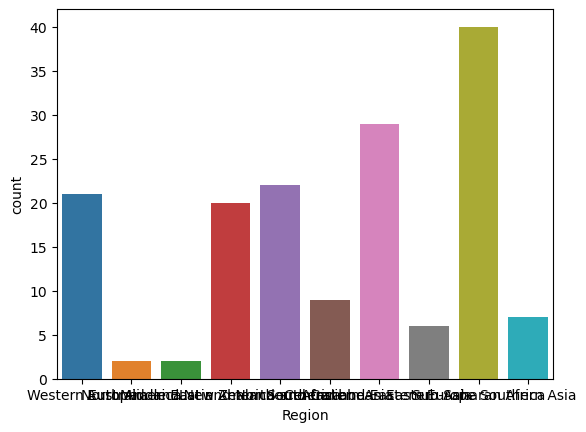

In [16]:
# Visualize the region wise count of countries
print(df["Region"].value_counts())
ax = sns.countplot(x = "Region", data = df)

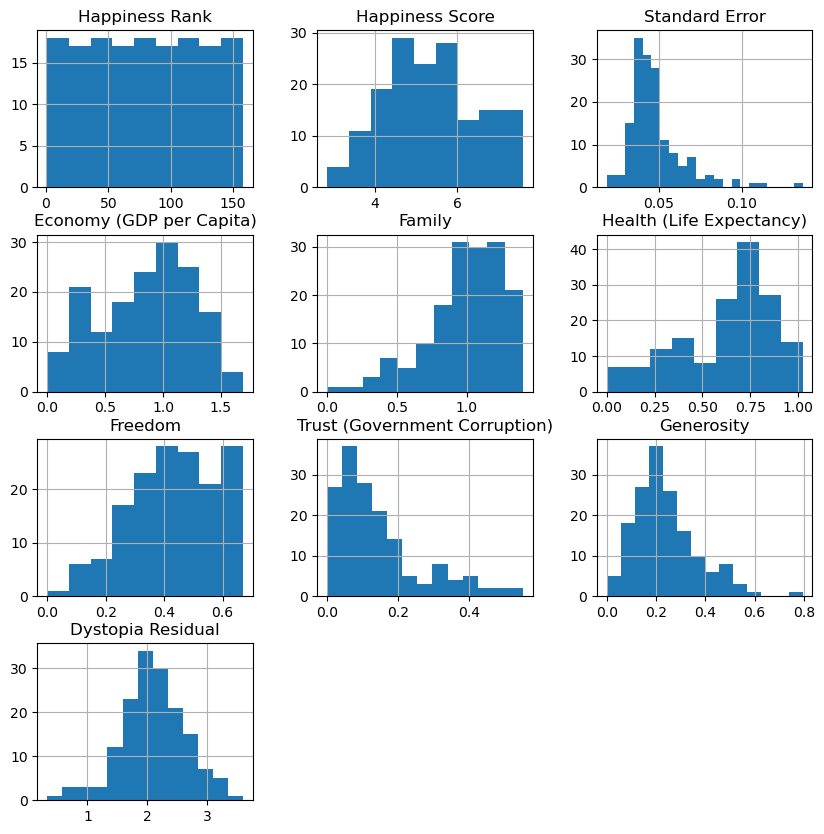

In [17]:
# checking the frequency distribution of the each numerical variables using histogram
df.hist(bins='auto', figsize=(10,10));

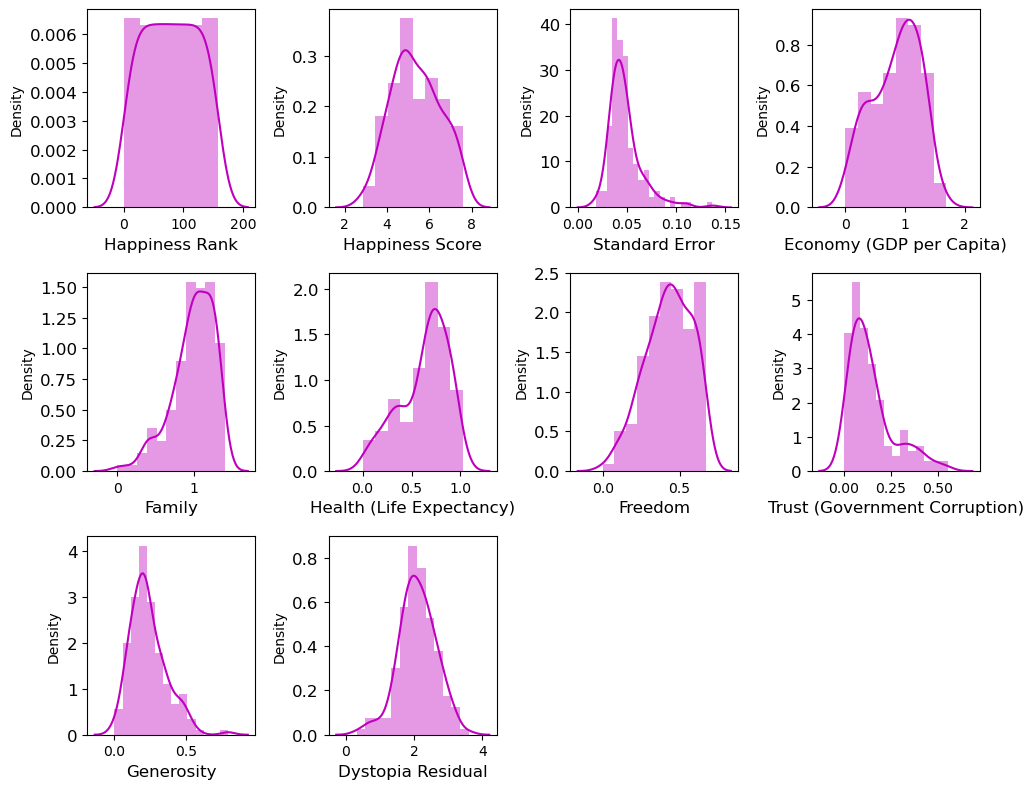

In [18]:
# Let's check how the data is distributed along with the density plot for each numerical column
plt.figure(figsize = (10,8), facecolor = "white")
plotnumber = 1

for col in num_col:
    if plotnumber <= 10:
        ax = plt.subplot(3,4, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

#### Bivariate Analysis

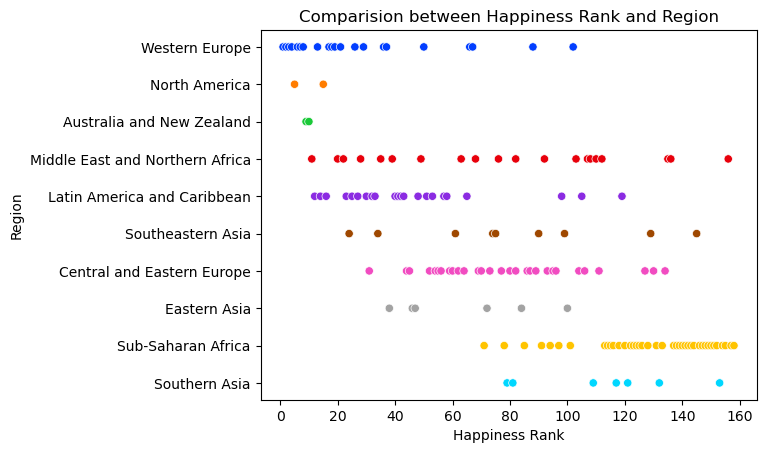

In [19]:
# Happiness Rank vs Region
plt.title("Comparision between Happiness Rank and Region")
sns.scatterplot(x = "Happiness Rank", y = "Region", data = df, hue = "Region", palette = "bright",legend = False)
plt.show()

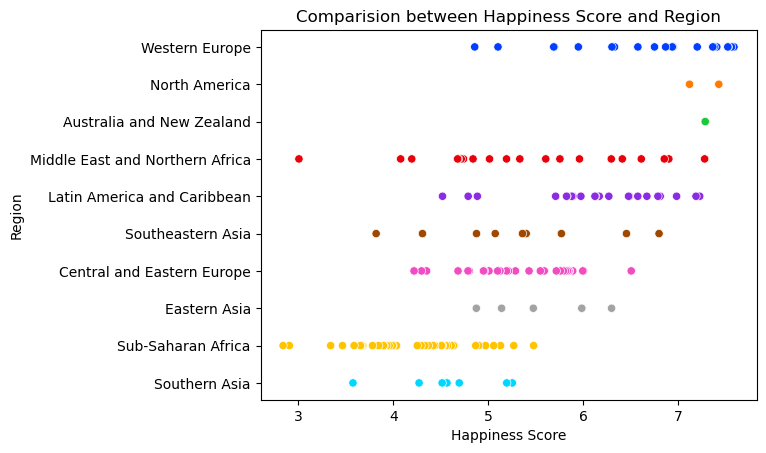

In [20]:
# Happiness Score vs Region
plt.title("Comparision between Happiness Score and Region")
sns.scatterplot(x = "Happiness Score", y = "Region", data = df, hue = "Region", palette = "bright", legend = False)
plt.show()

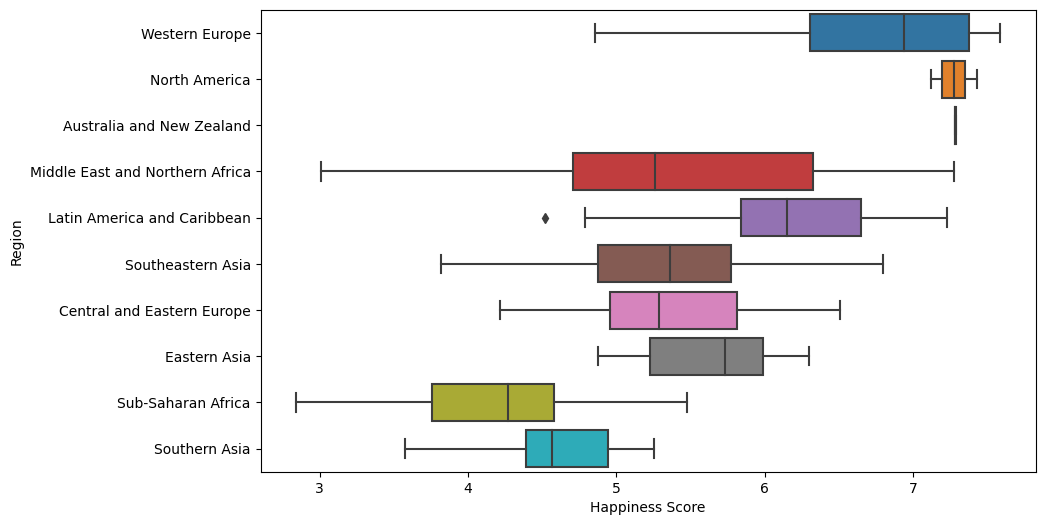

In [21]:
# Happiness Score vs Region
plt.figure(figsize = (10,6))
sns.boxplot(x = "Happiness Score", y = "Region", data = df)
plt.show()

#### Multivariate Analysis

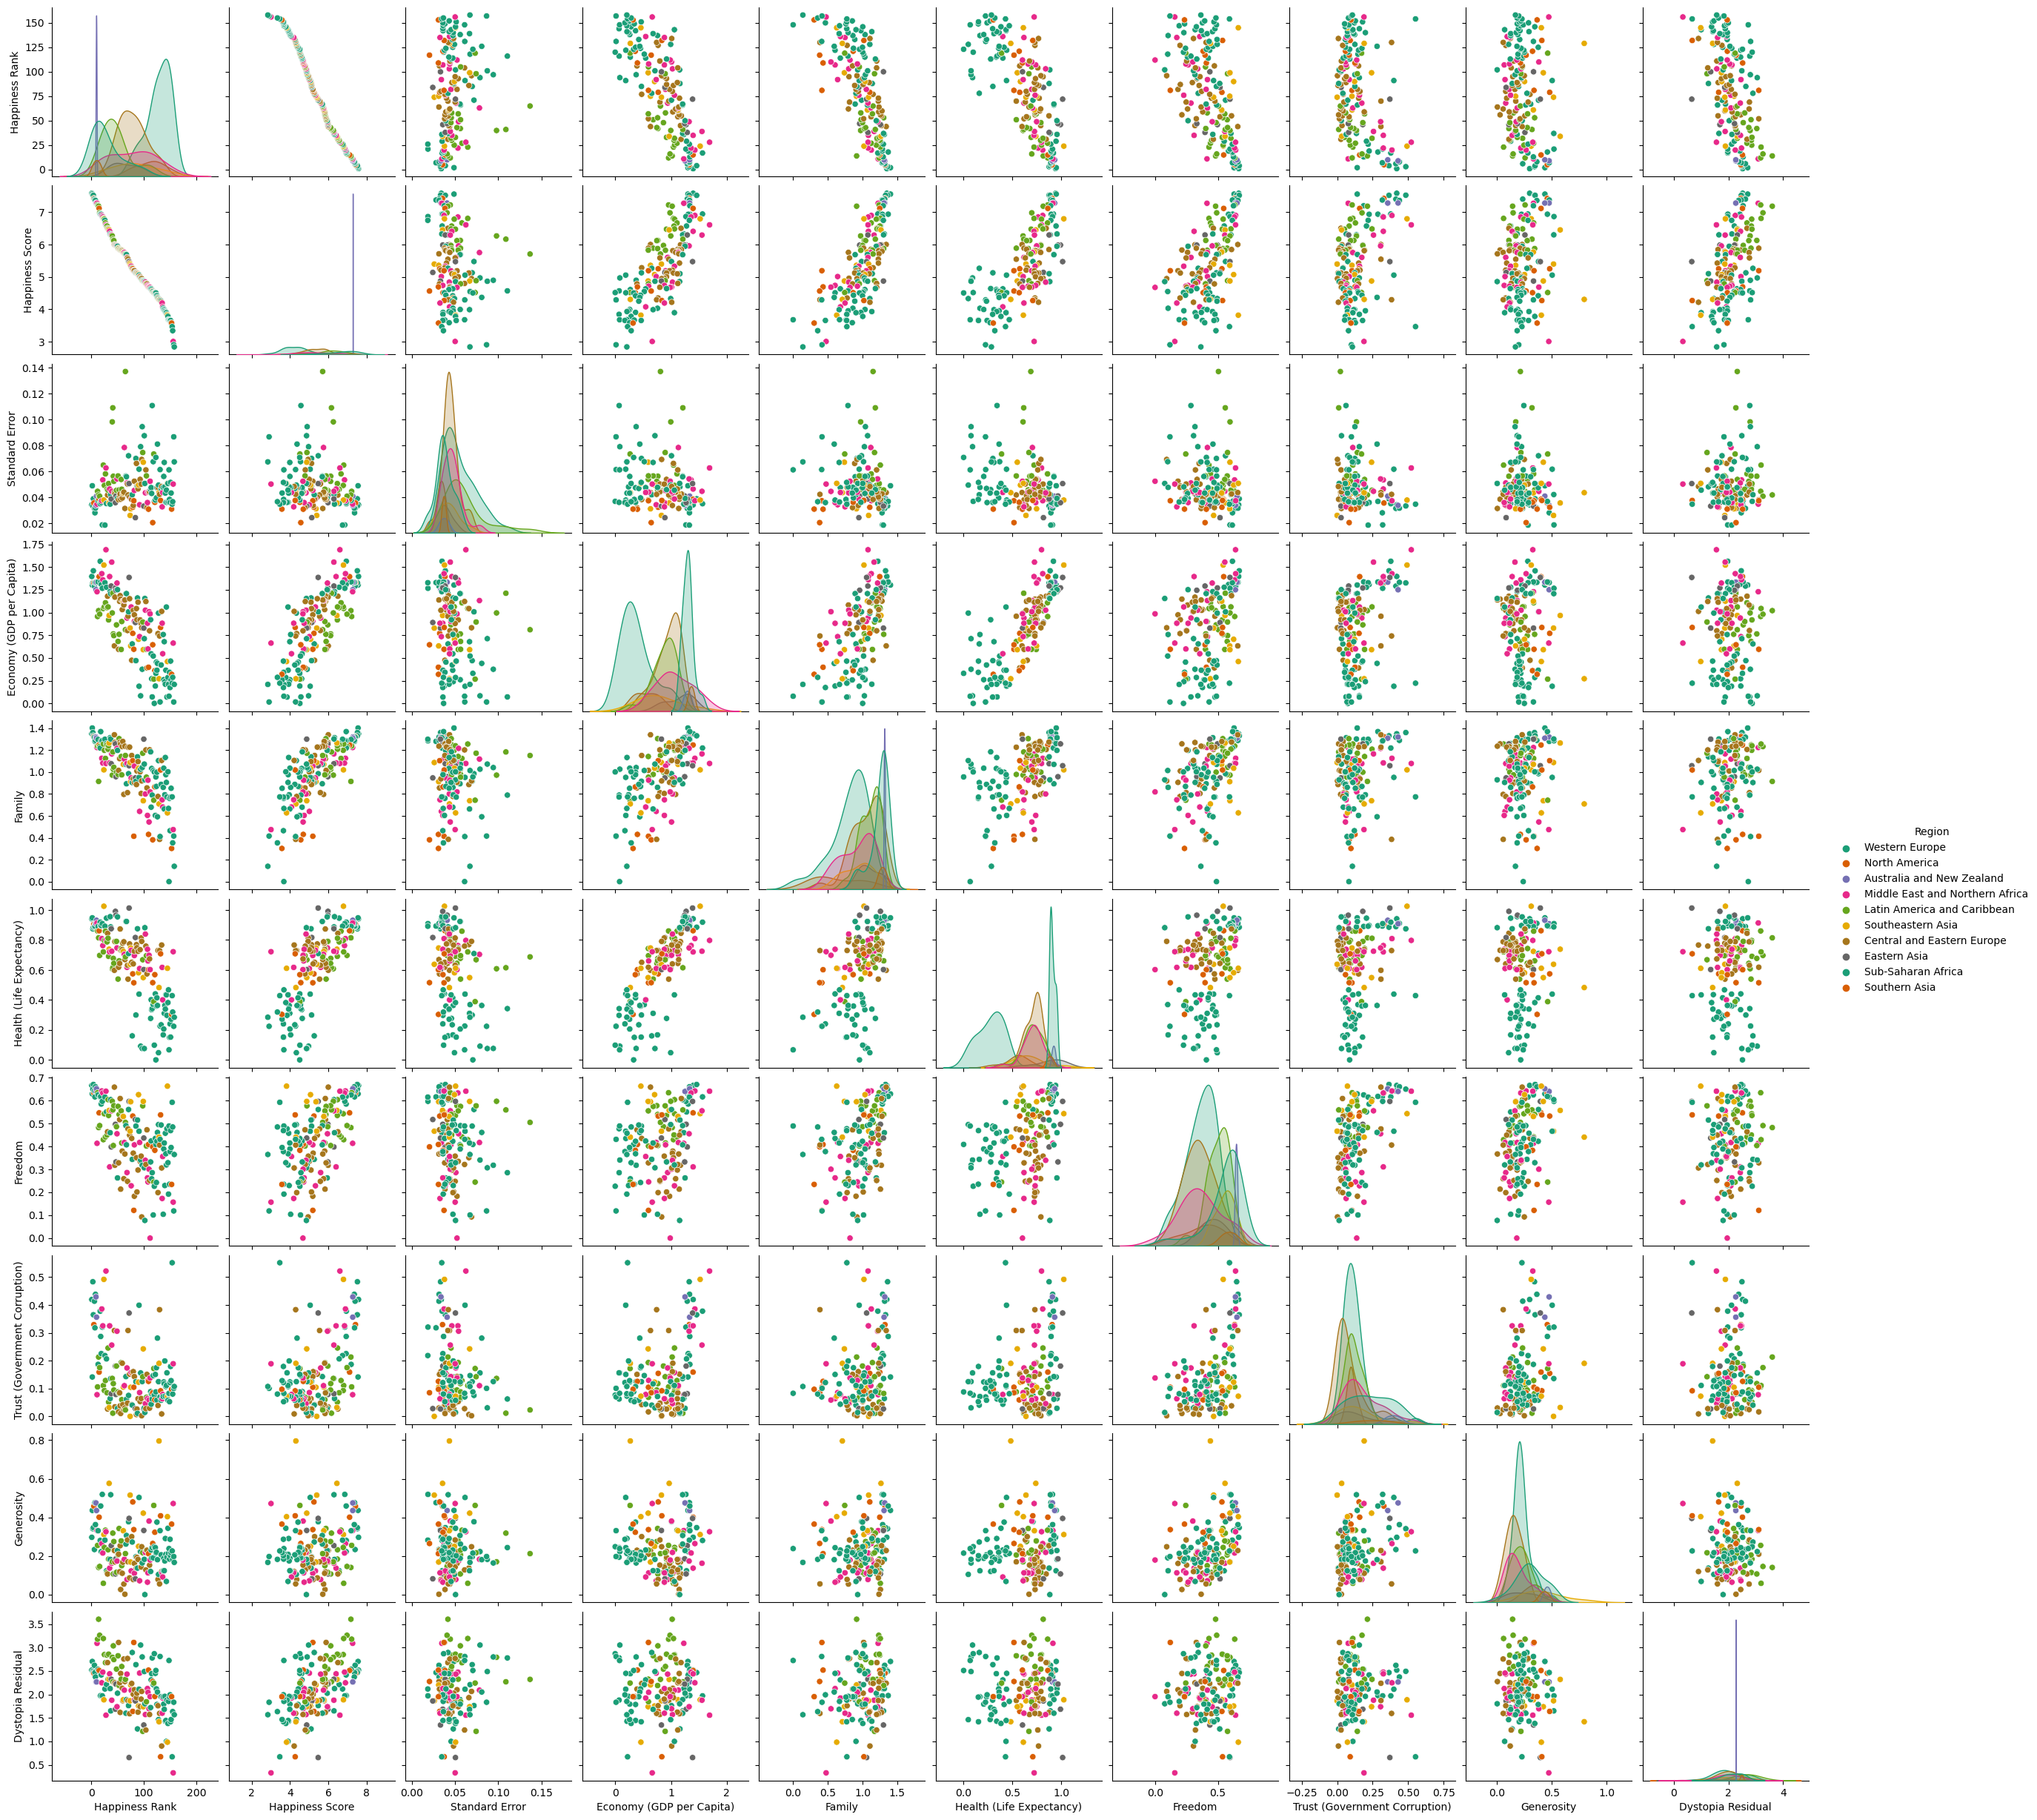

In [22]:
sns.pairplot(df, hue = "Region", palette = "Dark2")
plt.show()

#### Checking for Outliers

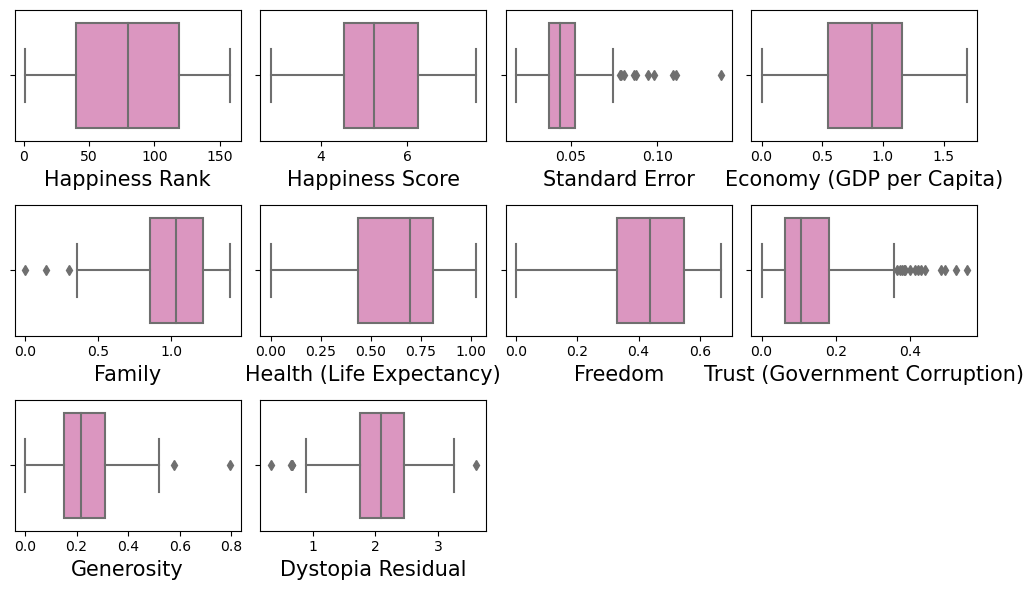

In [23]:
# let's check for outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1

for col in num_col:
    if plotnumber <= 10:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
    
plt.tight_layout()

In [27]:
from scipy.stats import zscore
outlier_features = df[['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

z = np.abs(zscore(outlier_features))
z

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.320281,2.309652,0.471040,0.758258
1,0.055889,1.514458,0.016480,1.575856,1.092857
2,0.854487,1.361054,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228,2.588925
154,0.662582,2.346860,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.381419,1.856891,3.208430
156,2.263962,2.118467,0.357715,0.316950,0.481985


In [28]:
# Identifiying outliers 
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]),
 array([2, 0, 0, 0, 3, 1, 2, 4, 1]))

In [29]:
z.iloc[27,2]

3.1646194851713774

In [30]:
z.iloc[40,0]

3.5727739331415806

In [31]:
z.iloc[157,1]

3.1347248549706186

In [32]:
# Now removing outliers using zscore & creating new dataframe to see the % of data we lost from removing outliers.
df1 = df[(z<3).all(axis = 1)]

print("Old Data Frame: ", df.shape[0])
print("New Data Frame: ", df1.shape[0])
print("Data loss percentage: ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100 )


Old Data Frame:  158
New Data Frame:  149
Data loss percentage:  5.69620253164557


In [33]:
# # Using IQR method to remove outliers

# # First finding IQR for each outlier column
# outlier_columns = ['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
# Q1 = df[outlier_columns].quantile(0.25)
# Q3 = df[outlier_columns].quantile(0.75)
# IQR = Q3 - Q1

# # Determining upper and lower bounds to identify outliers using IQR value
# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR

# # Spotting outliers
# outliers = df[((df[outlier_columns] < lower) | (df[outlier_columns] > upper)).any(axis = 1)]

# # Removing outliers

# df2 = df[~((df[outlier_columns] < lower) | (df[outlier_columns] > upper)).any(axis = 1)]
# print("Old Data Frame: ", df.shape[0])
# print("New Data Frame: ", df2.shape[0])

# print("Data loss percentage: ", ((df.shape[0]-df2.shape[0])/df.shape[0])*100 )

# print("\n Outliers removed", outliers)

#### Encoding categorical columns to numerical before checking for shewness of data

In [34]:
# Import and initilize Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

encode_mappings = {}

# Converting categorical columns to numerical
for i in df1.columns:
    if df1[i].dtypes == "object":
        original = df1[i].unique()
        df1[i] = OE.fit_transform(df1[[i]])
        encoded = OE.transform(original.reshape(-1,1)).flatten()
        encode_mappings[i] = dict(zip(original, encoded))
        
print("\n Details of the mapping: ")
for i, map in encode_mappings.items():
    print(f"{i} mapping: {map}")    


 Details of the mapping: 
Country mapping: {'Switzerland': 129.0, 'Iceland': 57.0, 'Denmark': 36.0, 'Norway': 101.0, 'Canada': 24.0, 'Finland': 44.0, 'Netherlands': 95.0, 'Sweden': 128.0, 'New Zealand': 96.0, 'Australia': 6.0, 'Israel': 63.0, 'Costa Rica': 32.0, 'Austria': 7.0, 'Mexico': 88.0, 'United States': 141.0, 'Brazil': 18.0, 'Luxembourg': 79.0, 'Ireland': 62.0, 'Belgium': 12.0, 'United Arab Emirates': 139.0, 'United Kingdom': 140.0, 'Oman': 102.0, 'Venezuela': 144.0, 'Singapore': 117.0, 'Panama': 105.0, 'Germany': 48.0, 'Chile': 26.0, 'France': 45.0, 'Argentina': 4.0, 'Czech Republic': 35.0, 'Uruguay': 142.0, 'Colombia': 28.0, 'Thailand': 133.0, 'Saudi Arabia': 113.0, 'Spain': 123.0, 'Malta': 85.0, 'Taiwan': 130.0, 'Kuwait': 71.0, 'Suriname': 126.0, 'El Salvador': 41.0, 'Guatemala': 51.0, 'Uzbekistan': 143.0, 'Slovakia': 118.0, 'Japan': 66.0, 'South Korea': 122.0, 'Ecuador': 39.0, 'Bahrain': 9.0, 'Italy': 64.0, 'Bolivia': 15.0, 'Moldova': 89.0, 'Paraguay': 106.0, 'Kazakhstan':

In [35]:
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,57.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,36.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,101.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Clearly, we can see that all the categorical columns are converted to numerical by using Ordinal encoder. Now all the columns are numerical and hence we can go for checking skewness of data.

#### Checking for Skewness

In [36]:
df1.skew()

Country                          0.000000
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Skewness is a measure of symmetry. A data set, is symmetric if it looks the same to the left and right of the center point. A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0.

The rule of thumb for skewness:

    If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data are moderately skewed
    If the skewness is less than -1 or greater than 1, the data are highly skewed
    
Generally, We remove skewness from data if skewness value is less than -1 or greater than 1.

From the above it is clear that the features Standard Error and Trust(Government Corruption) shows highly skewed positively and the features Family, Health and Generosity shows moderately skewed negatively. Let's use cube root method to remove skewness from the Trust (Government Corruption)feature with high skewness among all. 

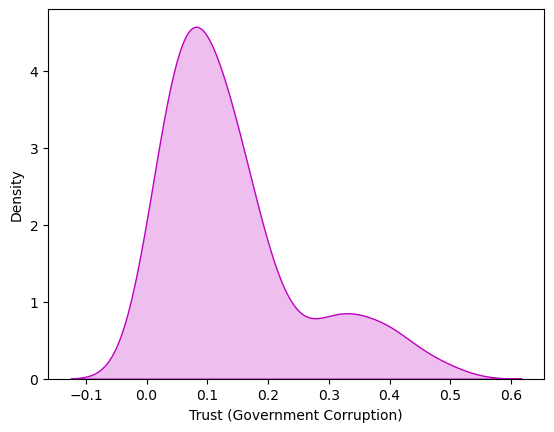

In [37]:
# Let's visualize how the data has been distributed in Trust after removing skewness
sns.distplot(df1["Trust (Government Corruption)"], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

In [38]:
# Removing skewness using Cuberoot method
df1["Trust (Government Corruption)"] = np.cbrt(df1["Trust (Government Corruption)"])
df1.skew()

Country                          0.000000
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

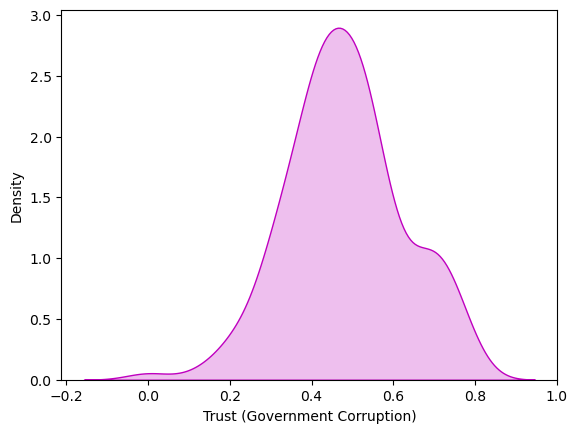

In [39]:
# Let's visualize how the data has been distributed in Trust after removing skewness
sns.distplot(df1["Trust (Government Corruption)"], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

In [40]:
# Removing skewness using Cuberoot method
df1["Standard Error"] = np.cbrt(df1["Standard Error"])
df1.skew()

Country                          0.000000
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In gereral we care to remove highly skewed data. Hence, we can assume that "skewness is removed from the data set"
however, still there is moderate skewness present in the features Family, Health and Generosity columns of the data set.

#### Collinearity

Correlation between target and feature variables

In [41]:
# Checking correlation between features and the target
cor = df1.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.009603,-0.125591,0.120329,-0.002321,0.039897,0.202092,0.037660,0.091689,0.041773,0.099905,0.048377
Region,0.009603,1.000000,0.184520,-0.145850,-0.047835,-0.224928,-0.127749,-0.334531,0.101335,0.211246,0.305791,-0.059494
Happiness Rank,-0.125591,0.184520,1.000000,-0.992921,0.219425,-0.773651,-0.720359,-0.736758,-0.571089,-0.365700,-0.225626,-0.526680
Happiness Score,0.120329,-0.145850,-0.992921,1.000000,-0.237228,0.773577,0.720868,0.729191,0.585066,0.394775,0.250903,0.528334
Standard Error,-0.002321,-0.047835,0.219425,-0.237228,1.000000,-0.244856,-0.129305,-0.343251,-0.202292,-0.095125,-0.155298,0.028798
Economy (GDP per Capita),0.039897,-0.224928,-0.773651,0.773577,-0.244856,1.000000,0.628589,0.817470,0.376780,0.231317,0.020730,0.026936
Family,0.202092,-0.127749,-0.720359,0.720868,-0.129305,0.628589,1.000000,0.503890,0.474229,0.180054,0.154011,0.118062
Health (Life Expectancy),0.037660,-0.334531,-0.736758,0.729191,-0.343251,0.817470,0.503890,1.000000,0.382595,0.158670,0.129328,0.031212
Freedom,0.091689,0.101335,-0.571089,0.585066,-0.202292,0.376780,0.474229,0.382595,1.000000,0.482062,0.428718,0.058596
Trust (Government Corruption),0.041773,0.211246,-0.365700,0.394775,-0.095125,0.231317,0.180054,0.158670,0.482062,1.000000,0.241413,0.107929


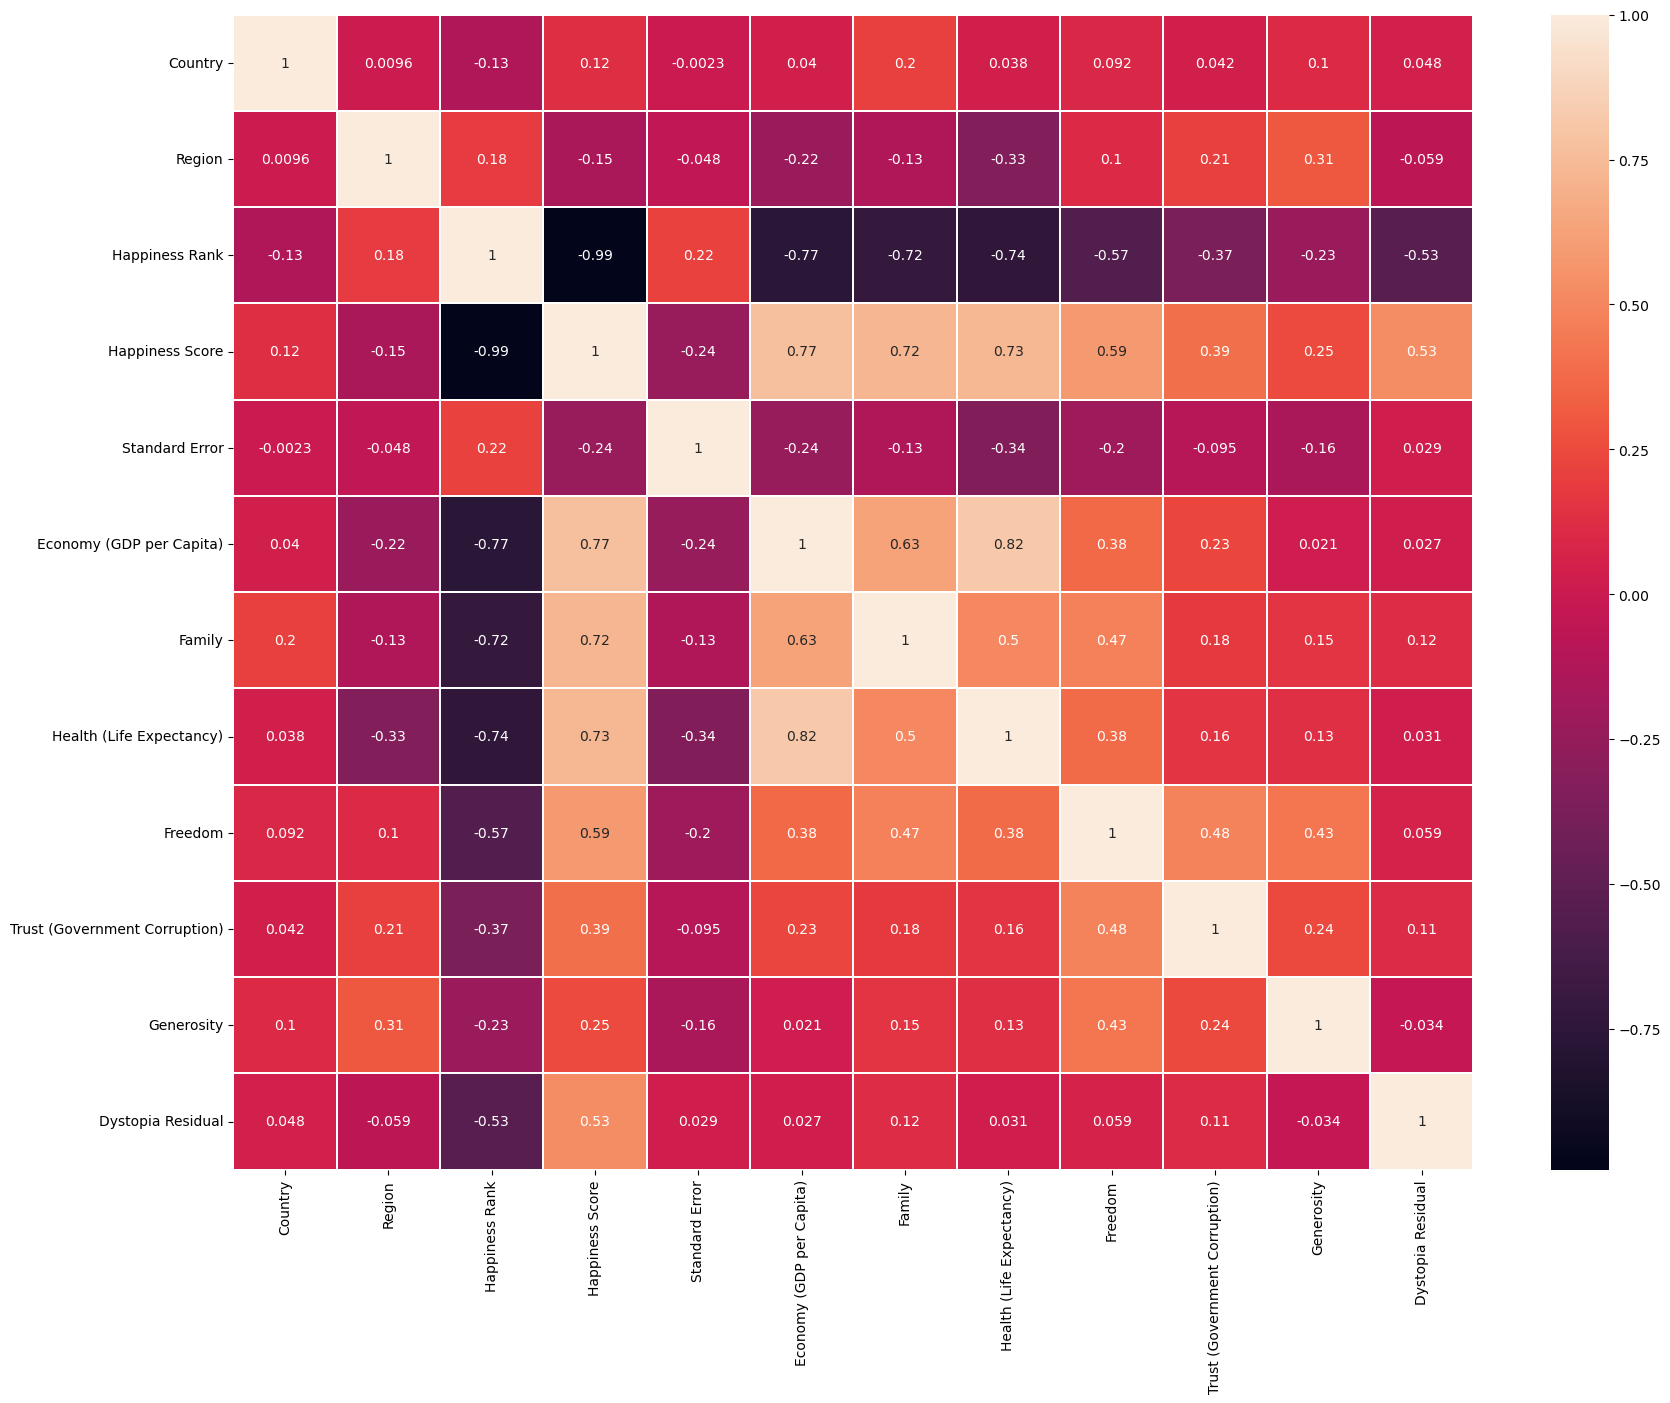

In [42]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), linewidths = 0.1, annot = True)
plt.yticks(rotation = 0)
plt.show()

In [43]:
# Checking correlation values of target label

cor["Happiness Score"].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.729191
Family                           0.720868
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.394775
Generosity                       0.250903
Country                          0.120329
Region                          -0.145850
Standard Error                  -0.237228
Happiness Rank                  -0.992921
Name: Happiness Score, dtype: float64

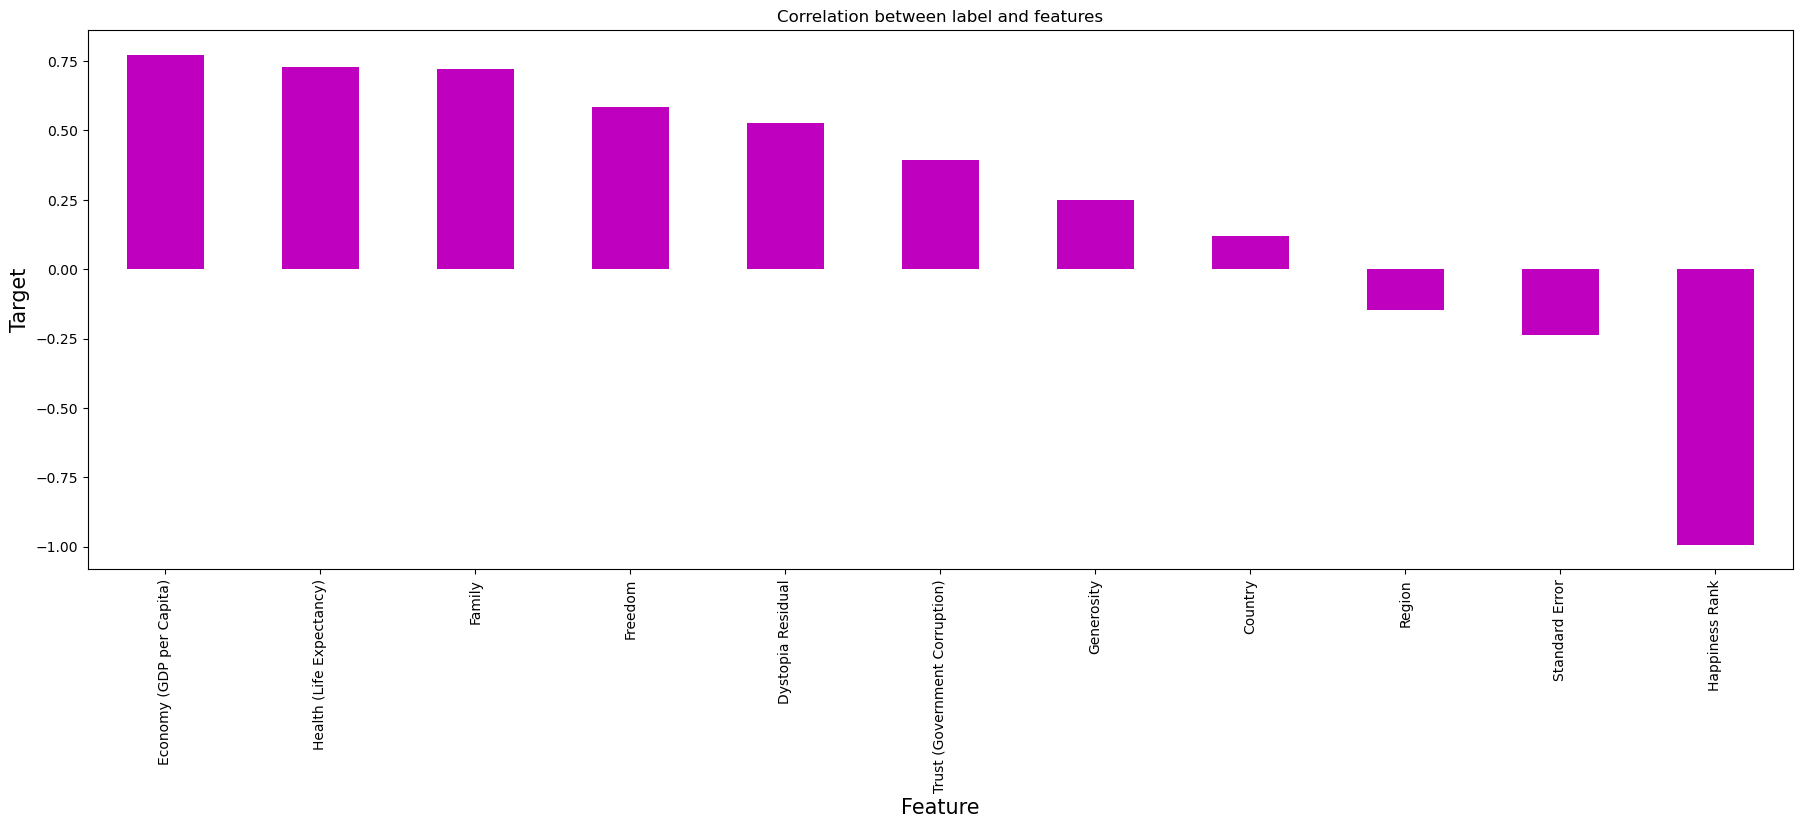

In [44]:
# Visualize the correlation between label and features using bar plot
plt.figure(figsize = (22, 7))
df1.corr()["Happiness Score"].sort_values(ascending = False).drop(["Happiness Score"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features")
plt.show()

The above bar plot, gives the clear picture of how features correlated (positively or negatively) with the target label. Here the feature Happiness Rank is highly correlated negatively which make sense as Happiness Score increases Ranking will decrease. The features Economy, Health, Family, Freedom, Dystopia Residual, Trust and Generosity shows positively correlated with target label. The features Country and Region shows very less correlated with the target.

#### Feature Selection

As part of feature selection here we drop the column "Country" which has all unique values. 

In [45]:
# Dropping the Country column
df1.drop(['Country'], axis = 1, inplace = True)

df1

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,9.0,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,9.0,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,9.0,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,5.0,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8.0,151,3.655,0.371834,0.46534,0.77115,0.15185,0.46866,0.563805,0.20165,1.41723
151,8.0,152,3.587,0.350990,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
152,7.0,153,3.575,0.313597,0.31982,0.30285,0.30335,0.23414,0.459770,0.36510,1.95210
154,8.0,155,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


### Separating features and target label

In [46]:
X = df1.drop("Happiness Score", axis = 1)
y = df1["Happiness Score"]

### Feature Scaling using Standard Scalarization

We need to scale/normalize the data using Standard Scalarization method to overcome the issue of biasness.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.296837,-1.713905,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,1.296837,-1.691535,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,1.296837,-1.669166,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,1.296837,-1.646796,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-0.026647,-1.624427,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,0.965966,1.641542,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,0.965966,1.663911,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,0.635095,1.686281,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,0.965966,1.731020,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


#### Checking for Multi-collinearity using Variance Inflation Factor (VIF)

In [48]:
# Finding variance inflation factor in each scaled columns i.e, X

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,1.510017,Region
1,83.717989,Happiness Rank
2,1.204750,Standard Error
3,14.101199,Economy (GDP per Capita)
4,6.382560,Family
5,8.868004,Health (Life Expectancy)
6,3.582500,Freedom
7,1.839397,Trust (Government Corruption)
8,2.316675,Generosity
9,19.394755,Dystopia Residual


By checking VIF values we can find that the features are causing multicollinearity problem. Here we can see that features Happiness Rank, Economy and Dystopia Residual have VIF value greater than 10 which means that they have high correlation with other features. We will drop the column with high VIF value first and check again for VIF values to see multicollinearity exist further.

In [49]:
# Dropping Happiness Rank column
X.drop("Happiness Rank", axis = 1, inplace = True)

In [50]:
# Again checking VIF values to confirm whether multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,1.442308,Region
1,1.189049,Standard Error
2,4.181745,Economy (GDP per Capita)
3,1.954727,Family
4,3.964567,Health (Life Expectancy)
5,1.934377,Freedom
6,1.418082,Trust (Government Corruption)
7,1.456783,Generosity
8,1.042173,Dystopia Residual


By dropping the column with highest VIF value that is Happiness Rank column, we have solved multicollinearity problem. We can now move ahead for model building.

#### Applying Machine Learning Algorithm (Modelling)

In [51]:
# Importing the required libraries to train the different regression Machine Learning models
from sklearn.model_selection import train_test_split

# Different ML Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

# Model parameters
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
# Finding the best random state
maxAccu = 0
bestRS = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    
    pred = LR.predict(X_test)
    accu = r2_score(y_test, pred)
    if accu > maxAccu:
        maxAccu = accu
        bestRS = i
        
print("Best r2 score is : ", maxAccu, "obtained at random_state: ", bestRS)

Best r2 score is :  0.9994919758997666 obtained at random_state:  69


#### Creating train test data split

In [53]:
# Split overall data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = bestRS)

#### Now applying all regression Machine Learning models imported above one by one to find the best model

#### 1. Linear Regression

In [54]:
LR = LinearRegression()
LR.fit(X_train, y_train)

pred_LR = LR.predict(X_test)
pred_train = LR.predict(X_train)
print(LR)

print("r2 Score: ", r2_score(y_test,pred_LR))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_LR))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_LR))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_LR)))

LinearRegression()
r2 Score:  0.9994919758997666
r2 Score on training data:  0.998712932509236
Mean Absolute Error:  0.020177736892087288
Mean Squared Error:  0.000644762706499358
root Mean Squared Error:  0.02539217805741284


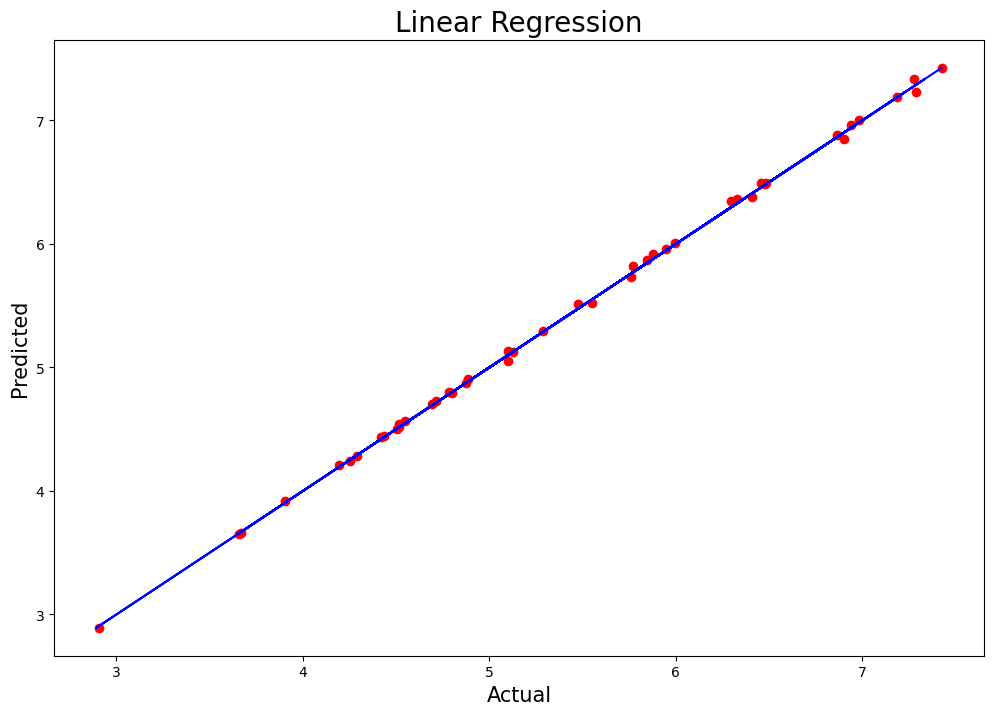

In [55]:
# Visualizing the Linear regression fit 

plt.figure(figsize = (12,8))
plt.scatter(x = y_test, y = pred_LR, color = "r")
plt.plot(pred_LR, pred_LR, color = "b")
plt.xlabel("Actual", fontsize = 15)
plt.ylabel("Predicted", fontsize = 15)
plt.title("Linear Regression", fontsize = 20)
plt.show()

#### 2. Random Forest Regressor 

In [56]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
    
pred_RFR = RFR.predict(X_test)
pred_train = RFR.predict(X_train)
print(RFR)

print("r2 Score: ", r2_score(y_test,pred_RFR))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_RFR))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_RFR))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_RFR)))

RandomForestRegressor()
r2 Score:  0.8857588360124167
r2 Score on training data:  0.9861042264865378
Mean Absolute Error:  0.2974526666666667
Mean Squared Error:  0.14499005470888882
root Mean Squared Error:  0.3807755962622721


#### 3. K-Nearest Neighbors Regressor (KNN)

In [57]:
knn = KNN()
knn.fit(X_train, y_train)
    
pred_knn = knn.predict(X_test)
pred_train = knn.predict(X_train)
print(knn)

print("r2 Score: ", r2_score(y_test,pred_knn))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_knn))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_knn))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_knn)))

KNeighborsRegressor()
r2 Score:  0.8989102862081555
r2 Score on training data:  0.9268157001000653
Mean Absolute Error:  0.2763333333333334
Mean Squared Error:  0.1282987902222223
root Mean Squared Error:  0.35818820502945414


#### 4. Decision Tree Regressor

In [58]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
    
pred_DTR = DTR.predict(X_test)
pred_train = DTR.predict(X_train)
print(DTR)

print("r2 Score: ", r2_score(y_test,pred_DTR))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_DTR))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_DTR))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_DTR))) 

DecisionTreeRegressor()
r2 Score:  0.7926919938075747
r2 Score on training data:  1.0
Mean Absolute Error:  0.42308888888888885
Mean Squared Error:  0.2631065555555555
root Mean Squared Error:  0.5129391343576307


#### 5. Support Vector Regressior (SVR)

In [59]:
svr = SVR()
svr.fit(X_train, y_train)
    
pred_svr = svr.predict(X_test)
pred_train = svr.predict(X_train)
print(svr)

print("r2 Score: ", r2_score(y_test,pred_svr))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_svr))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_svr))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_svr))) 

SVR()
r2 Score:  0.8933683465800699
r2 Score on training data:  0.9907145225202028
Mean Absolute Error:  0.23377030613764574
Mean Squared Error:  0.13533238566035027
root Mean Squared Error:  0.3678755029359121


#### 6. ExtraTreesRegressor

In [60]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train, y_train)
    
pred_ETR = ETR.predict(X_test)
pred_train = ETR.predict(X_train)
print(svr)

print("r2 Score: ", r2_score(y_test,pred_ETR))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_ETR))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_ETR))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_ETR))) 

SVR()
r2 Score:  0.9057778786663083
r2 Score on training data:  1.0
Mean Absolute Error:  0.253046222222222
Mean Squared Error:  0.11958273226666646
root Mean Squared Error:  0.34580736294455394


#### 7. Gradient Boosting Regressor

In [61]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
    
pred_GBR = GBR.predict(X_test)
pred_train = GBR.predict(X_train)
print(GBR)

print("r2 Score: ", r2_score(y_test,pred_GBR))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_GBR))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_GBR))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_GBR)))

GradientBoostingRegressor()
r2 Score:  0.9181240673275705
r2 Score on training data:  0.9995594224450548
Mean Absolute Error:  0.25517950348133084
Mean Squared Error:  0.10391347166952121
root Mean Squared Error:  0.32235612553435555


#### 8. Lasso Regression

In [62]:
lasso = Lasso()
lasso.fit(X_train, y_train)
    
pred_lasso = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
print(lasso)

print("r2 Score: ", r2_score(y_test,pred_lasso))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_lasso))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_lasso))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_lasso)))

Lasso()
r2 Score:  -0.00012875752879892843
r2 Score on training data:  0.0
Mean Absolute Error:  0.9730166666666663
Mean Squared Error:  1.2693211291666666
root Mean Squared Error:  1.1266415264700067


#### 9. Ridge Regression

In [63]:
rid = Ridge()
rid.fit(X_train, y_train)
    
pred_rid = rid.predict(X_test)
pred_train = rid.predict(X_train)
print(rid)

print("r2 Score: ", r2_score(y_test,pred_rid))
print("r2 Score on training data: ", r2_score(y_train,pred_train))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred_rid))
print("Mean Squared Error: ", mean_squared_error(y_test, pred_rid))
print("root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_rid)))

Ridge()
r2 Score:  0.9994822940800567
r2 Score on training data:  0.9986771214337055
Mean Absolute Error:  0.02028945795248973
Mean Squared Error:  0.0006570504626847866
root Mean Squared Error:  0.025632995585471212


### Cross Validation Score

cross_val_score(modelname, features, targetlabel, cv = foldvalue, scoring = "accuracy")

cv = 5 --- it's a fold value 1, 2, 3, 4, 5 -- default value for cv is 5 

In Classification algorithms -- default scoring parameter is accuracy

In Regression models -- default scoring parameter is r2 score

In [64]:
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(LR, X, y, cv = 5, scoring = 'r2')
print(score1)
print(score1.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_LR) - score1.mean()))

[0.94572882 0.98085496 0.93913237 0.95405204 0.99269286]
0.9624922113545095
Difference b/w r2 and cross validation scores is:  0.03699976454525711


In [65]:
score2 = cross_val_score(RFR, X, y)
print(score2)
print(score2.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_RFR) - score2.mean()))

[-7.80439621 -0.80705752 -0.99544238 -2.46224523 -6.42146803]
-3.6981218746341553
Difference b/w r2 and cross validation scores is:  4.5838807106465715


In [66]:
score3 = cross_val_score(knn, X, y)
print(score3)
print(score3.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_knn) - score3.mean()))

[-9.46969877 -2.34197743 -2.62037772 -7.79688596 -5.30789807]
-5.507367590074568
Difference b/w r2 and cross validation scores is:  6.406277876282724


In [67]:
score4 = cross_val_score(DTR, X, y)
print(score4)
print(score4.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_DTR) - score4.mean()))

[ -5.3300055   -9.20479466  -6.94591308 -14.9171032   -6.03573377]
-8.486710043891758
Difference b/w r2 and cross validation scores is:  9.279402037699333


In [68]:
score5 = cross_val_score(svr, X, y)
print(score5)
print(score5.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_svr) - score5.mean()))

[-11.0319397    0.11715099   0.78657128  -0.47808616  -5.51123541]
-3.223507801065522
Difference b/w r2 and cross validation scores is:  4.116876147645592


In [69]:
score6 = cross_val_score(ETR, X, y)
print(score6)
print(score6.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_ETR) - score6.mean()))

[-7.44635705  0.15800953 -0.76324624 -1.35560141 -5.89040766]
-3.059520568191666
Difference b/w r2 and cross validation scores is:  3.9652984468579744


In [70]:
score7 = cross_val_score(GBR, X, y)
print(score7)
print(score7.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_GBR) - score7.mean()))

[-4.0451124   0.0055173  -1.17935341 -2.60438958 -4.28853895]
-2.4223754064418648
Difference b/w r2 and cross validation scores is:  3.340499473769435


In [71]:
score8 = cross_val_score(lasso, X, y)
print(score8)
print(score8.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_lasso) - score8.mean()))

[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
Difference b/w r2 and cross validation scores is:  23.099402935024948


In [72]:
score9 = cross_val_score(rid, X, y)
print(score9)
print(score9.mean())

print("Difference b/w r2 and cross validation scores is: ", (r2_score(y_test, pred_rid) - score9.mean()))

[0.91952944 0.9815267  0.93811063 0.95029691 0.99082657]
0.9560580499015024
Difference b/w r2 and cross validation scores is:  0.04342424417855428


We have computed difference between r2 and cross validation scores of different Machine Learning algorithms used above. By observing the computed values, we can conclude that Linear Regression model is our best fitting and performing model among all models used here.

### Hyper Parameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [False, True],
              'n_jobs' : [1,5,10,15,None]
              }

gscv = GridSearchCV(LinearRegression(), parameters, cv = 5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [False, True]})

In [74]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [75]:
Best_model = LinearRegression(copy_X= True, fit_intercept = True, n_jobs = 1, positive = True)
Best_model.fit(X_train, y_train)

pred = Best_model.predict(X_test)
accu = r2_score(y_test, pred)
print(accu*100)

99.9484173702356


By tuning hyper parameters, we can see that the r2 score of LinearRegression is not increased because it is about 100% already. 

In [76]:
# Saving the best fitting and performing model  using .pkl
import joblib
joblib.dump(Best_model, "Happiness_Score_Prediction.pkl")

['Happiness_Score_Prediction.pkl']

In [77]:
# Let's load the saved model and get the predictions
model = joblib.load("Happiness_Score_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([7.42448915, 5.8189053 , 6.87597043, 4.54111764, 6.48713791,
       6.38091504, 4.91620799, 4.7972524 , 4.20793257, 6.48819155,
       4.44122639, 4.70105575, 7.22881777, 5.12836629, 3.64999516,
       5.29209888, 5.13319051, 4.7305325 , 4.87902493, 4.56576041,
       4.79712359, 5.52052183, 6.36624407, 7.32887012, 4.28365269,
       6.34490364, 3.9185768 , 3.65421371, 5.732955  , 6.96161132,
       5.96336772, 6.0044775 , 6.84842729, 4.24479475, 4.50341385,
       4.43514854, 7.1888123 , 5.5150046 , 5.91604519, 2.89991263,
       6.99772641, 4.5108138 , 5.05908721, 6.49086534, 5.86837301])

These are the predicted values of Happiness Score. Lets compare them with actual values.

In [78]:
actual = np.array(y_test)
df_compare = pd.DataFrame()
df_compare["Predicted"] = prediction
df_compare["Original"] = actual

df_compare

,Predicted,Original
0,7.424489,7.427
1,5.818905,5.770
2,6.875970,6.867
3,4.541118,4.518
4,6.487138,6.477
5,6.380915,6.411
6,4.916208,4.885
7,4.797252,4.786
8,4.207933,4.194
9,6.488192,6.455
